Import the libraries needed

In [1]:
import pandas as pd
import numpy as np
import os
import pyodbc
pyodbc.drivers()
from datetime import datetime
import psutil
# For the Yahoo Finance api
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')

C:\Users\m033\Anaconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (3.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


In [2]:
pd.set_option('max_row', None)
#pd.options.display.max_rows = 1000

# Set a value for the home folder.
home_folder = "."

# Set values for the various paths.
input_path = home_folder + "\data"

print('==========================')
now = datetime.now()
print(now)
print('==========================')
print(psutil.virtual_memory())
print('==========================')

2024-07-19 18:43:14.544032
svmem(total=16756752384, available=4397400064, percent=73.8, used=12359352320, free=4397400064)


### All the data used has been provisined in Get_The_Data.ipynb

# 1. Get the switchable funds/switch counts.

In [3]:
filename = input_path + '\Horizon_Switch_Counts.csv'
df_Horizon_Switch_Counts = pd.read_csv(filename, delimiter=',',low_memory=False, header=0)
print(len(df_Horizon_Switch_Counts.index))
df_Horizon_Switch_Counts.head(5)


66


,SnapshotYrMth,PopCount,SwitchCount
0,201901,62801,75
1,201902,63720,32
2,201903,64775,91
3,201904,65713,50
4,201905,66774,48


In [4]:
df_Horizon_Switch_Counts.tail(55)

,SnapshotYrMth,PopCount,SwitchCount
11,201912,74552,73
12,202001,75533,107
13,202002,76627,64
14,202003,77564,120
15,202004,77660,57
16,202005,78503,42
17,202006,79443,32
18,202007,80531,64
19,202008,81439,43
20,202009,82814,44


# Look at the distribution of the data.

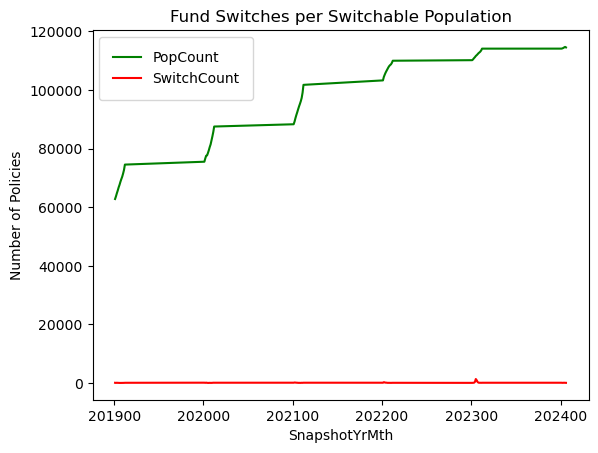

In [5]:
# Get current axis
ax = plt.gca()

# line plot for math marks
df_Horizon_Switch_Counts.plot(kind='line',x='SnapshotYrMth',y='PopCount',color='green', ax=ax)
df_Horizon_Switch_Counts.plot(kind='line',x='SnapshotYrMth',y='SwitchCount',color='red', ax=ax)
 
# set the title
plt.title('Fund Switches per Switchable Population')
plt.ylabel("Number of Policies")

# plotting a line plot after changing it's width and height
plt.rcParams["figure.figsize"] = (10,9)
ax.legend(loc='upper left', borderpad=1)

# show the plot
plt.show()

In [6]:
##df_Horizon_Switches['SnapshotYrMth'] = pd.to_datetime(df_Horizon_Switches['SnapshotYrMth'], format='%Y%m', errors='coerce').dropna()
##df_Horizon_Switches.head(100)

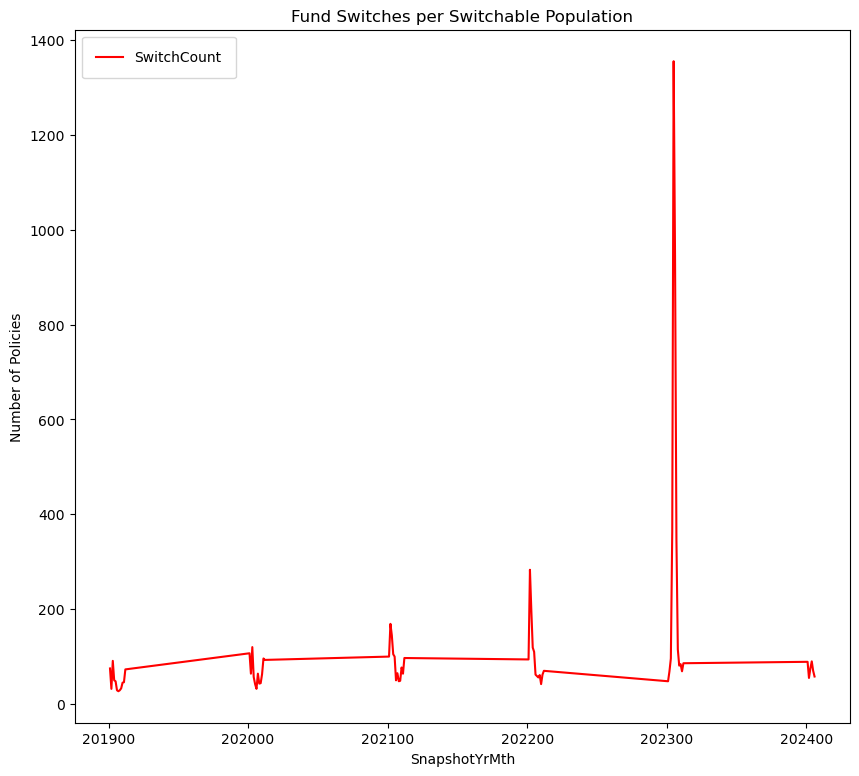

In [7]:
# Get current axis
ax = plt.gca()

# line plot for math marks
df_Horizon_Switch_Counts.plot(kind='line',x='SnapshotYrMth',y='SwitchCount',color='red', ax=ax)
 
# set the title
plt.title('Fund Switches per Switchable Population')
plt.ylabel("Number of Policies")

# plotting a line plot after changing it's width and height
plt.rcParams["figure.figsize"] = (10,90)
ax.legend(loc='upper left', borderpad=1)

# show the plot
plt.show()

# Investigated the spike and it is downw to a fund closure on those dates.

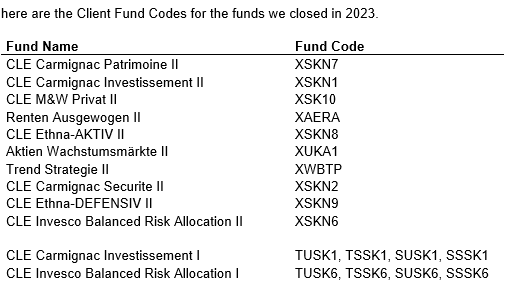

In [8]:
%who_ls DataFrame 

['df_Horizon_Switch_Counts']

In [9]:
del df_Horizon_Switch_Counts

print('==========================')
now = datetime.now()
print(now)
print('==========================')
print(psutil.virtual_memory())
print('==========================')

2024-07-19 18:43:28.927187
svmem(total=16756752384, available=4424265728, percent=73.6, used=12332486656, free=4424265728)
